In [21]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2023-02-22 09:14:07--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  3.24MB/s    in 3.0s    

2023-02-22 09:14:11 (3.24 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# https://blog.csdn.net/weixin_39934640/article/details/110844456
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk

In [23]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
df=df[df.columns[1:]]
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


# 预处理
1. 按Contest number由小到大排列
2. 对x tries percentage(x=1 2 3 4 5 6 7)进行归一化，使其结果和等于100 
3. 词性标注前，检查单词是否准确，是否有特殊字符或是单词长度不为5，改正单词

In [24]:
# 按Contest number由小到大排列
df = df.sort_values(by='Contest number', ignore_index=True)
# 对x tries percentage(x=1 2 3 4 5 6 7)进行归一化，使其结果和等于100
percent = df[df.columns[5:]].sum(axis=1)
for column in df.columns[5:]:
    df[column]=df[column]/percent*100
# 判断当前日期为星期几，周一为0 
df['week']=df['Date'].apply(lambda x:x.weekday())
df['is_weekend'] = df['week'].apply(lambda x:x>4)

In [25]:
# 找出单词中存在的错误字母 
word = ''.join(list(df['Word']))
for letter in range(26):
    letter=chr(letter+97)
    word=word.replace(letter, '')
word


' ï'

In [26]:
# 找出长度不足5的单词
for i in df['Word']:
    if len(i)!=5:
        print(i)

favor 
tash
clen
rprobe


In [27]:
# 改单词
df['Word']=df['Word'].apply(lambda x:x.replace('ï', 'i'))
df['Word']=df['Word'].apply(lambda x:x.replace('rprobe', 'probe'))
df['Word']=df['Word'].apply(lambda x:x.replace('clen', 'clean'))
df['Word']=df['Word'].apply(lambda x:x.replace('tash', 'trash'))
df['Word']=df['Word'].apply(lambda x:x.replace('favor ', 'favor'))

# 正式处理
1. 对所有单词按照11个常用词性分类，并根据词性进行one-hot编码，生成单词的11维数字特征
2. 计算单词频数Frequency作为单词的第12维数字特征
3. 计算PSRTW = Number in hard mode/Number of reported results
4. 

In [28]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 对所有单词按照11个常用词性分类，并根据词性进行one-hot编码，生成单词的11维数字特征
# 对单词进行词性标注
df['tag'] = df['Word'].apply(lambda x:nltk.pos_tag(nltk.word_tokenize(x))[0][1])
# 按词性对单词进行one-hot编码
for tag in np.unique(df['tag']):
    df[tag]=df['tag']==tag
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,JJ,JJR,MD,NN,NNS,PRP$,RB,VB,VBG,VBN
0,2022-01-07,202,slump,80630,1362,1.000000,3.000000,23.000000,39.000000,24.000000,...,False,False,False,True,False,False,False,False,False,False
1,2022-01-08,203,crank,101503,1763,1.000000,5.000000,23.000000,31.000000,24.000000,...,False,False,False,True,False,False,False,False,False,False
2,2022-01-09,204,gorge,91477,1913,1.000000,3.000000,13.000000,27.000000,30.000000,...,False,False,False,True,False,False,False,False,False,False
3,2022-01-10,205,query,107134,2242,1.000000,4.000000,16.000000,30.000000,30.000000,...,False,False,False,True,False,False,False,False,False,False
4,2022-01-11,206,drink,153880,3017,0.990099,8.910891,34.653465,33.663366,15.841584,...,False,False,False,True,False,False,False,False,False,False


In [29]:
# 计算单词频数Frequency作为单词的第12维数字特征
# 统计26个字母在所有单词中出现的次数(αi：阿尔法是A-Z i取1-26)  
df['word_len'] = df['Word'].apply(lambda x:len(set(x)))
word = ''.join(list(df['Word']))
words = {}
for letter in range(26):
    letter=chr(letter+97)
    words[letter]=[word.count(letter)]
words=pd.DataFrame(words).T
words.columns=['频数']
# words

In [30]:
# 计算单词频数：
def comput_frequncy(x):
    ans = 0
    for i in x:
        ans+=words['频数'][i]
    return ans
df['Frequency']=df['Word'].map(comput_frequncy)
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,MD,NN,NNS,PRP$,RB,VB,VBG,VBN,word_len,Frequency
0,2022-01-07,202,slump,80630,1362,1.000000,3.000000,23.000000,39.000000,24.000000,...,False,True,False,False,False,False,False,False,5,382
1,2022-01-08,203,crank,101503,1763,1.000000,5.000000,23.000000,31.000000,24.000000,...,False,True,False,False,False,False,False,False,5,487
2,2022-01-09,204,gorge,91477,1913,1.000000,3.000000,13.000000,27.000000,30.000000,...,False,True,False,False,False,False,False,False,4,553
3,2022-01-10,205,query,107134,2242,1.000000,4.000000,16.000000,30.000000,30.000000,...,False,True,False,False,False,False,False,False,5,448
4,2022-01-11,206,drink,153880,3017,0.990099,8.910891,34.653465,33.663366,15.841584,...,False,True,False,False,False,False,False,False,5,413


In [31]:
# the percentage of scores reported that were 目标百分比
df['PSRTW']=df['Number in hard mode']/df['Number of reported results']
df

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,NN,NNS,PRP$,RB,VB,VBG,VBN,word_len,Frequency,PSRTW
0,2022-01-07,202,slump,80630,1362,1.000000,3.000000,23.000000,39.000000,24.000000,...,True,False,False,False,False,False,False,5,382,0.016892
1,2022-01-08,203,crank,101503,1763,1.000000,5.000000,23.000000,31.000000,24.000000,...,True,False,False,False,False,False,False,5,487,0.017369
2,2022-01-09,204,gorge,91477,1913,1.000000,3.000000,13.000000,27.000000,30.000000,...,True,False,False,False,False,False,False,4,553,0.020912
3,2022-01-10,205,query,107134,2242,1.000000,4.000000,16.000000,30.000000,30.000000,...,True,False,False,False,False,False,False,5,448,0.020927
4,2022-01-11,206,drink,153880,3017,0.990099,8.910891,34.653465,33.663366,15.841584,...,True,False,False,False,False,False,False,5,413,0.019606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0.000000,2.000000,17.000000,35.000000,29.000000,...,True,False,False,False,False,False,False,4,479,0.096365
355,2022-12-28,557,impel,20160,1937,0.000000,3.030303,21.212121,40.404040,25.252525,...,True,False,False,False,False,False,False,5,517,0.096081
356,2022-12-29,558,havoc,20001,1919,0.000000,2.000000,16.000000,38.000000,30.000000,...,True,False,False,False,False,False,False,5,458,0.095945
357,2022-12-30,559,molar,21204,1973,0.000000,4.040404,21.212121,38.383838,26.262626,...,True,False,False,False,False,False,False,5,593,0.093048


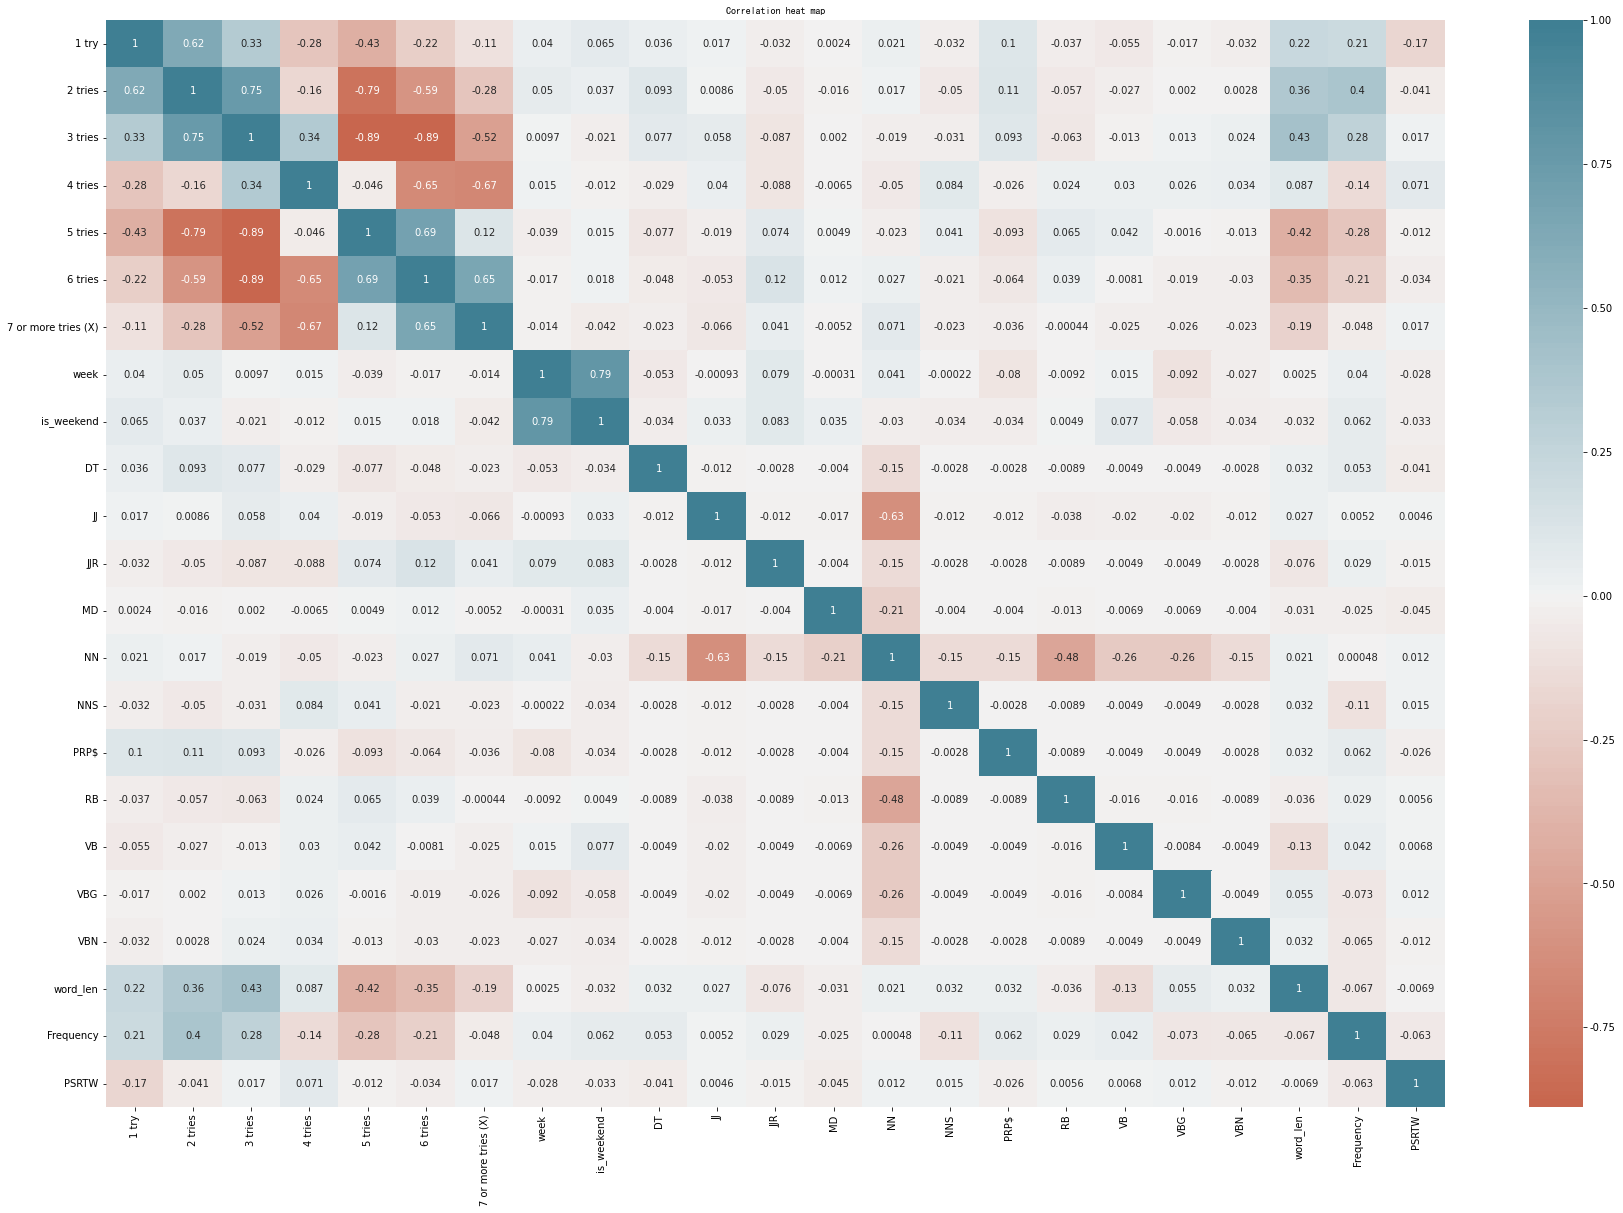

In [32]:
import seaborn as sns
# sns.heatmap(cor_df)
cor_df=df[df.columns[5:]].corr()

plt.subplots(figsize = (30,20))
sns.heatmap(cor_df,cmap=sns.diverging_palette(20, 220, n=200) ,annot=True,center = 0        )

plt.title('Correlation heat map',fontproperties=zhfont)
plt.savefig('第一题第二小问相关性热力图',fontproperties=zhfont)
plt.show()

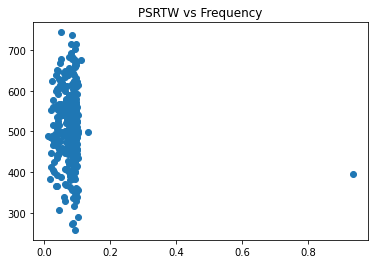

In [33]:
plt.scatter(df['PSRTW'], df['Frequency'])
plt.title('PSRTW vs Frequency')
plt.savefig('PSRTW与Frequency结果散点图')
plt.show()

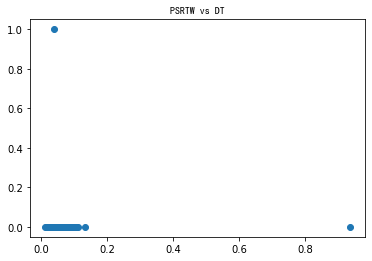

In [34]:
plt.scatter(df['PSRTW'], df['DT'])
plt.title('PSRTW vs DT',fontproperties=zhfont)
plt.savefig('PSRTW与DT得出结果散点图')
plt.show()

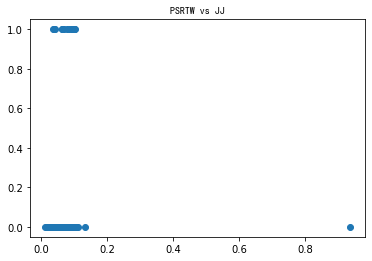

In [35]:
plt.scatter(df['PSRTW'], df['JJ'])
plt.title('PSRTW vs JJ',fontproperties=zhfont)
plt.savefig('PSRTW与JJ结果散点图')
plt.show()

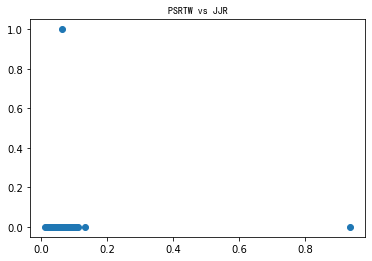

In [36]:
plt.scatter(df['PSRTW'], df['JJR'])
plt.title('PSRTW vs JJR',fontproperties=zhfont)
plt.savefig('PSRTW与JJR结果散点图')
plt.show()

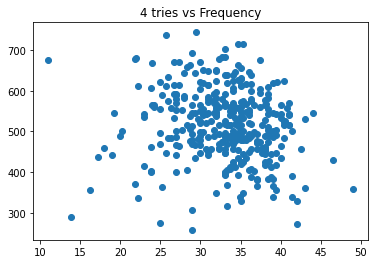

In [37]:
plt.scatter(df['4 tries'], df['Frequency'])
plt.title('4 tries vs Frequency')
plt.savefig('4 tries与Frequency结果散点图')
plt.show()

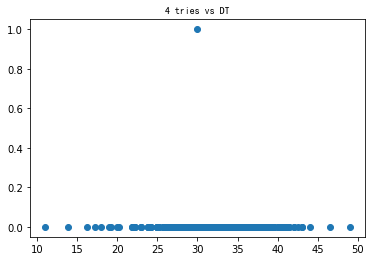

In [38]:
plt.scatter(df['4 tries'], df['DT'])
plt.title('4 tries vs DT',fontproperties=zhfont)
plt.savefig('4 tries与DT得出结果散点图')
plt.show()

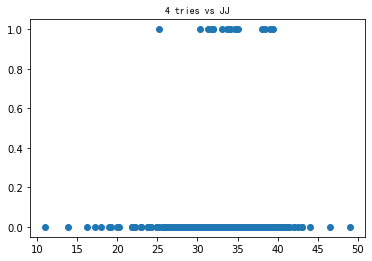

In [39]:
plt.scatter(df['4 tries'], df['JJ'])
plt.title('4 tries vs JJ',fontproperties=zhfont)
plt.savefig('4 tries与JJ结果散点图')
plt.show()

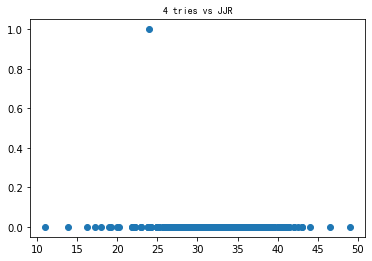

In [40]:
plt.scatter(df['4 tries'], df['JJR'])
plt.title('4 tries vs JJR',fontproperties=zhfont)
plt.savefig('4 tries与JJR结果散点图')
plt.show()